# Big Mart Sales Analysis

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


In [1]:
#importing packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import *
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
#from sklearn.svm import SVC
from sklearn.metrics import *
%matplotlib inline

C:\Users\karan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#import and read data sets
ds = pd.read_csv('Big_mart.csv')
df=ds.head()
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#features of data set
ds.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
#describe data set
df.describe

<bound method NDFrame.describe of   Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1

In [5]:
#shape of data set
ds.shape

(8523, 12)

In [6]:
#find all null values in data set
ds.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#  Handling missing values in the dataset and mis-coded data:

In [7]:
#replace NaN value in feature:Item_weight 
ds.Item_Weight.fillna(ds.Item_Weight.mean(),inplace=True)

In [8]:
#Replace missing value in feature:Outlet_size
ds.Outlet_Size.fillna('Missing',inplace=True)

In [9]:
#replace all change value from the pattern 
ds['Item_Fat_Content'] = ds['Item_Fat_Content'].replace('low fat','Low Fat')
ds['Item_Fat_Content'] = ds['Item_Fat_Content'].replace('LF','Low Fat')
ds['Item_Fat_Content'] = ds['Item_Fat_Content'].replace('reg','Regular')

--------------------------------------------------------------------

# Exploratory Data Analysis on the data


EDA will help in predict the item outlet sales based on various parameters which are continuous in nature.

# Discription about data:

This data is produced by the scientists at BigMart in 2013 and are available in CSV file.

Various features of data set are:

Item_Weight- define the weight of item.

Item_Fat_Content- Shows quality of item,whether the product is having low fat or regular fat.

Item_Visibility- Area allocated to particular item in the store

Item_Type- Classification of item.

Item_MRP- Maximum Retail Price of item.

Outlet_Establishment_Year - The year in which the store was established.

Outlet_Size- The size of the store in terms of ground area cover.

Outlet_Location_Type- The type of city in which the store is localised.

Outlet_Type- Whether the outlet is just a grocery store or some sort of supermarket.

Item_Outlet_Sales- Sales of the product in the particular store. 

Visualize the distributions of various features and correlations between them.

In [10]:
#Find correlation
ds.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


Univariate Analysis: Analyzing single feature of the data set.

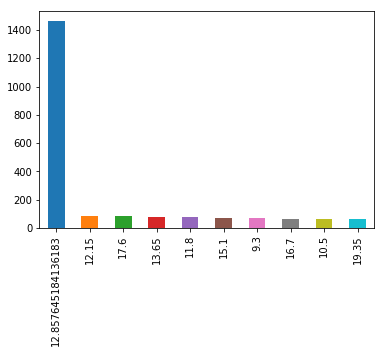

In [11]:
#bar plot for Item_weight of the data set
ds['Item_Weight'].value_counts().head(10).plot.bar()

The above graph shows:

1. Presents categorical data about weights of different items.

2. Their heights or lengths are proportional to the values that they represent.

3. The number of items is maximum at a value 12.857.


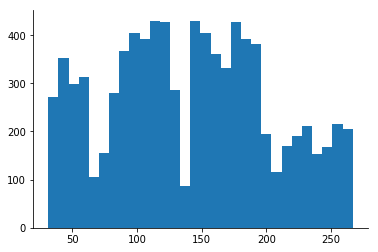

In [12]:
#plot histogram for item weigh.
plt.hist(x  = 'Item_MRP',data=ds, bins=30)
sns.despine()

From above graph:
    
1. Values of MRP are continuous in nature.

2. There are outliers in MRP values.

3. MRP is maximum at 120,140 and 180.



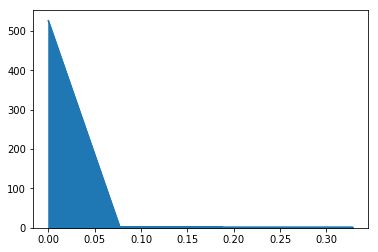

In [13]:
#area plot for Item_visibility
ds['Item_Visibility'].value_counts().plot.area()

The above graph shows:

1. Area distribution for item visibility.

2. Area visibility in the store lies between 0.0 to 0.08

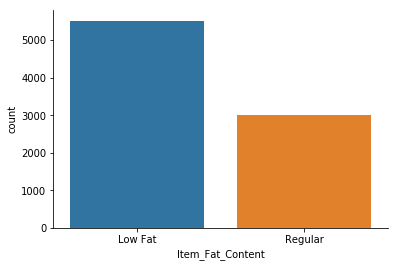

In [14]:
#Fat content of the item.
sns.countplot(x  = 'Item_Fat_Content',data=ds)
sns.despine()

The above graph shows:
1. There are only two types of item- the item having low fat or regular fat.
2. The item having low fat are very high in number and raise upto more than 5000.
3. The item having regular fat are around 3000.

C:\Users\karan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


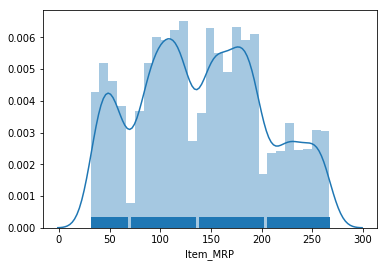

In [15]:
#distplot
sns.distplot(ds['Item_MRP'], rug = True);

The graph shows:
1. The MRP lies maximum at between the range 100 to 190.
2. Their are some outliers and data are continuous in nature.

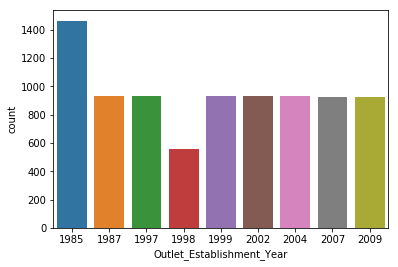

In [16]:
#countplot for the data set feature: Outlet_Establishment_year.
sns.countplot(x = 'Outlet_Establishment_Year', data = ds)

From above graph:
1. Outlet establishment is maximum in 1985 and it crosses the number 1400.
2. Outlet establishment is minimum in 1998 which was down to approx 480.
3. Rest of the year is having same outlet establishment of approx 880.

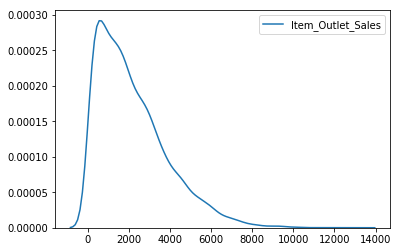

In [17]:
#Kde plot
sns.kdeplot(ds['Item_Outlet_Sales'])

The above graph shows, it is left screwd.
Here we need to perform normalisation.

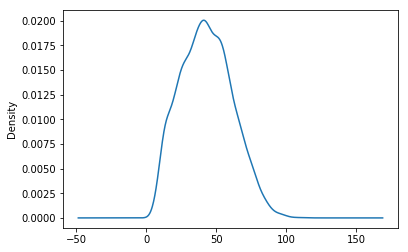

In [18]:
#plot root mean square
p = np.power(ds['Item_Outlet_Sales'],1/2)
p.plot(kind = 'kde')

1. After applying root mean square to normalise left screwed, Now the graph is better.

2. It shows the true variation of Item sale at outlets between 0 to 100.

3. Density for item sale is maximum to 0.0200.

Bivariant Graph: . It tells us about the dependencies, association and relation between two specific features. After analysing their relation, we can remove or change the level of their dependencies on each other.

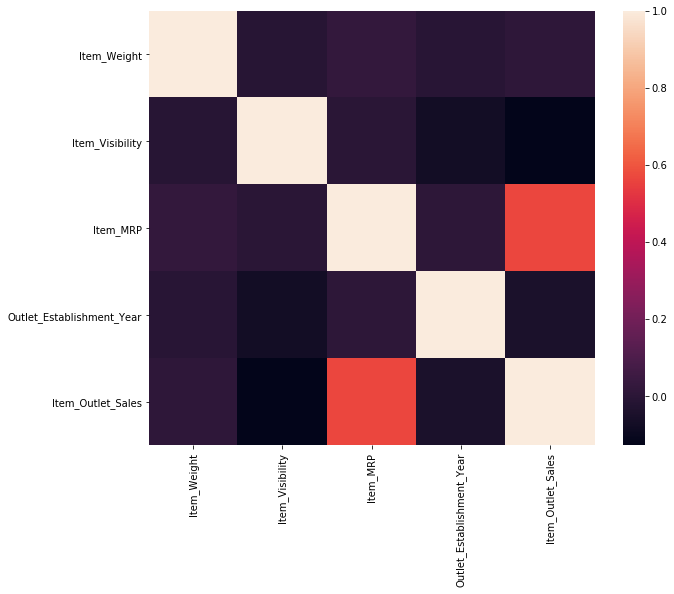

In [19]:
#plot heatmap to identify correlation
plt.figure(figsize=(10,8))
sns.heatmap(ds.corr())

The above correlation states that.

1. Item visibility is having almost null dependencies on Item_Outlet sales and Item _Establishment year.

2. Item outlet sales and MRP of the item is highly inter related to each other.

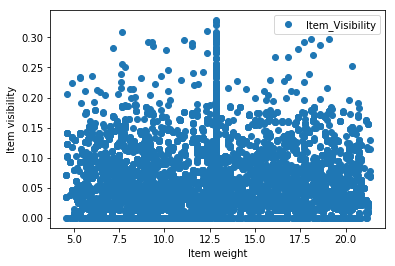

In [20]:
#plot Item_Weight Vs. Item_Visibility
ds.plot(x='Item_Weight', y= 'Item_Visibility', style ='o')
plt.xlabel('Item weight')
plt.ylabel('Item visibility')
plt.show()

1. The above scatter plot shows, there are many outliers in item visibility and their weight.

2. Item weight at 12.6 is maximum and its visibility crosses beyond 0.30 percent.

C:\Users\karan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\karan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


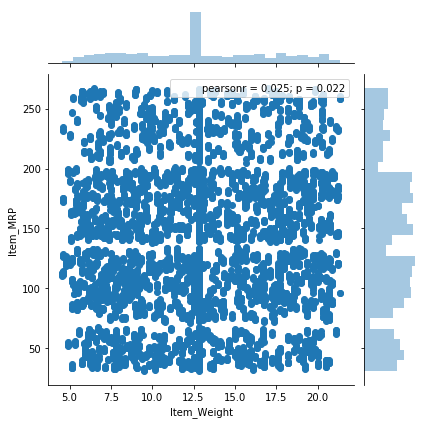

In [21]:
#jointplot between price and bedrooms
sns.jointplot(x='Item_Weight',y='Item_MRP',data=ds)

Item MRP at 12.6 and Item MRP between 75 to 200 is maximum.

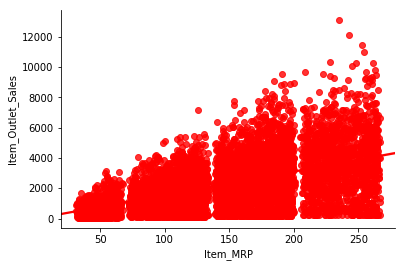

In [22]:
#regplot
sns.regplot(x = 'Item_MRP', y='Item_Outlet_Sales',data = ds, color = 'red')
sns.despine()

1. Item_outlet_Sales is directly dependent on its MRP.

2. With increase in MRP, sale also get increases.
   That is good for the store.

Multivariate Analysis: It help us to analyse more than two features of a data set at the same time.

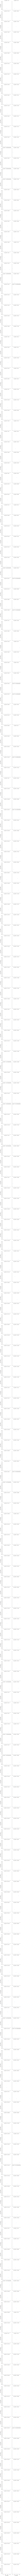

In [24]:
#facet grid
d=ds[1:500]
g = sns.FacetGrid(d, col='Item_MRP',col_wrap=2)
g.map(plt.scatter,'Item_Weight','Item_Visibility',alpha = 0.2)
sns.despine()

Above graph shows, Item MRP VS Item weight and Item visibility.

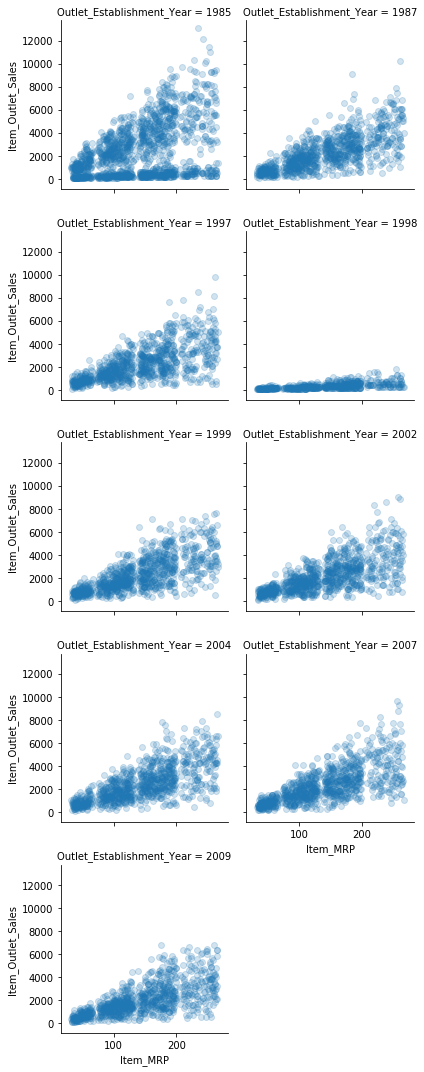

In [26]:
grid = sns.FacetGrid(ds, col='Outlet_Establishment_Year',col_wrap=2)
grid.map(plt.scatter,'Item_MRP','Item_Outlet_Sales',alpha = 0.2)
sns.despine()

1. Above graph shows, Outlet establishment year VS. Item MRP and Item outlet sales.

2. Graph is having many outliers.

3. Outlet sales is maxmum in 1985.

## Feature Engineering

Feature engineering means building additional features out of existing data which is often spread across multiple related tables. Feature engineering requires extracting the relevant information from the data and getting it into a single table which can then be used to train a machine learning model.

To perform feature engineering, we need to convert string to some values using get_dummies.

In [27]:
df = pd.get_dummies(ds, columns=['Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Fat_Content'])
df.head(20)

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular
0,FDA15,9.300000,0.016047,249.8092,OUT049,1999,3735.1380,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,DRC01,5.920000,0.019278,48.2692,OUT018,2009,443.4228,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,FDN15,17.500000,0.016760,141.6180,OUT049,1999,2097.2700,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,FDX07,19.200000,0.000000,182.0950,OUT010,1998,732.3800,0,0,0,...,0,0,0,1,1,0,0,0,0,1
4,NCD19,8.930000,0.000000,53.8614,OUT013,1987,994.7052,0,0,0,...,0,0,0,1,0,1,0,0,1,0
5,FDP36,10.395000,0.000000,51.4008,OUT018,2009,556.6088,1,0,0,...,0,0,0,1,0,0,1,0,0,1
6,FDO10,13.650000,0.012741,57.6588,OUT013,1987,343.5528,0,0,0,...,0,0,0,1,0,1,0,0,0,1
7,FDP10,12.857645,0.127470,107.7622,OUT027,1985,4022.7636,0,0,0,...,0,0,0,1,0,0,0,1,1,0
8,FDH17,16.200000,0.016687,96.9726,OUT045,2002,1076.5986,0,0,0,...,0,0,1,0,0,1,0,0,0,1
9,FDU28,19.200000,0.094450,187.8214,OUT017,2007,4710.5350,0,0,0,...,0,0,1,0,0,1,0,0,0,1


set train and target data to perform regression.

There are multiple benefits of using regression analysis. They are as follows:

1. It indicates the significant relationships between dependent variable and independent variable.
2. It indicates the strength of impact of multiple independent variables on a dependent variable.

In [28]:
y = df['Item_Outlet_Sales']
x = df.drop(['Item_Outlet_Sales', 'Item_Identifier','Outlet_Identifier'],axis=1)

In [29]:
#perform split on training data
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size = 0.3, random_state =85)

# Linear Regression

Linear Regression establishes a relationship between dependent variable (Y) and one or more independent variables (X) using a best fit straight line (also known as regression line).

In [30]:
regressor =  LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
regressor.score(x_test,y_test)

0.5607259789593095

In [34]:
#regressor1 =  LogisticRegression()
#regressor1.fit(x_train,y_train)
#k-Nearest Neighbors
from sklearn.neighbors import *
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

ValueError: Unknown label type: 'continuous'

## Random Forest Regressor
A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.

In [ ]:
clf = RandomForestRegressor(n_estimators=10,max_depth=6,random_state=42).fit(x_train,y_train)
results = model_selection.cross_val_score(clf, x_train,y_train)
results.mean()

## Gradient Boosting Regressor
Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=50)
gbr.fit(x_train,y_train)


In [ ]:
pred=gbr.predict(x_test)

In [ ]:
gbr.score(x_test,y_test)

## Summary
Following work flow have been performed.

1. Perform data cleaning using pandas library.

2. Exploratory Data Analysis on the data.

3. Visualize distributions and correlation of features.

4. Build a regression model taking the selected features through feature engineering. 

5. Pedict the item_outlet_sales for the test data:

   (a) More the price of data, more will be the sale.

   (b) With increase in outlet established year the sale graph goes down.

   (c) Item visibility should also be increase to increase sale.


## Result
Accuracy score of different regression model are:

Linear regression :0.586

Random Forest Regression : 0.586

Gradient Boosting Regressor: 0.606(Maximum)

